CIFAR is an acronym that stands for the Canadian Institute For Advanced Research. The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below. These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

0: airplane<br>
1: automobile<br>
2: bird<br>
3: cat<br>
4: deer<br>
5: dog<br>
6: frog<br>
7: horse<br>
8: ship<br>
9: truck<br><br>






# Importing libraries

In [1]:
# Import libraries
import tensorflow.keras as keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPool2D, Conv2D
from keras.optimizers import SGD

import matplotlib.pyplot as plt
%matplotlib inline

# Loading dataset

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Summarize the loaded dataset in format (number of images, height of each image, width of image, depth of each image (corresponding to Red, Green and Blue))
print('Shape of x_train', x_train.shape)
print('Shape of y_train', y_train.shape)
print('Shape of x_test', x_test.shape)
print('Shape of y_test', y_test.shape)

170508288/170498071 [==============================] - 6s 0us/step
Shape of x_train (50000, 32, 32, 3)
Shape of y_train (50000, 1)
Shape of x_test (10000, 32, 32, 3)
Shape of y_test (10000, 1)


# Preprocessing training and testing images

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


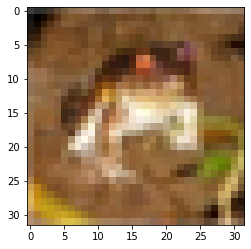

In [3]:
# Let us understand what is present inside "x_train" and "x_test"

# Will do it by visualizing first training image present in array format (computer will see the image in this format)
print(x_train[0])

# and by visualizing the same first training image in image format (not in array format as we humans cannot understand array format)
# this image will be alot of pixeled as original image is of 32x32 which is quite very small dimension
plt.imshow(x_train[0])

In [4]:
# Each image array is unsigned integers in the range between no color and full color (i.e. between 0 and 255).
# Thus we now normalize them to range 0 to 1, as it generally speeds up learning and leads to faster convergence.

# For this we first convert from integers to floats so that we can work with decimals while normalizing images between 0 and 1.
x_train_float = x_train.astype('float32')
x_test_float = x_test.astype('float32')

# And then normalize to range 0 to 1 by dividing the pixel values by the maximum value (i.e.255).
x_train_norm = x_train_float / 255.0
x_test_norm = x_test_float / 255.0

In [5]:
# Lets see whats the effect of doing normalization over image arrays by taking example of first training image
print(x_train_norm[0])

# On comparing from before image array (see in above code cell) we notice that now all image pixels are normalized between 0 and 1.

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


# Preprocessing training and testing labels

In [6]:
# Now let us understand how our testing and training labels look like by taking example of label of first training image
print(y_train[0])

# we already know from CIFAR-10 dataset that:
# label 0 corresponds to airplane
# label 1 corresponds to automobile
# label 2 corresponds to bird
# label 3 corresponds to cat
# label 4 corresponds to deer
# label 5 corresponds to dog
# label 6 corresponds to frog
# label 7 corresponds to horse
# label 8 corresponds to ship
# label 9 corresponds to truck

# Thus, first training image is of frog!

[6]


In [7]:
# We want probability of each of the 10 different classes/labels present in both training and testing dataset. For that, we use 10 output neurons in our neural network.
# In addition to this we also do "one-hot encoding" of our 10 the label into a set of 10 numbers where each number represents if the image belongs to that class or not. 
# Thus if an image belongs to the first class, the first number of this set will be a 1 and all other numbers in this set will be a 0. 

y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [8]:
# Lets see what's effect of using one-hot encoding on first training label
print(y_train_one_hot[0])

# Thus, as clear from below result all places are "0" except the 6th place
# This shows that this label corresponds to 6th class/label 

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


.

Till now we have written code to download training and testing dataset, to visualize physical existence of training and testing images, to normalize them between 0 and 1, to visualize physical existence of training and testing labels and to one-hot encoding training and testing labels. Now lets build and train models !!

.

# Functions for training, evaluating and plotting accuracy curves of neural nets

In [9]:
# As required by assigned task, this function will plot train and test accuracy (as we have passed "test data" in "validation_data" 
# attribute of model.fit, thus for this case we refer "val_accuracy" as "test accuracy") curves w.r.t each epoch.

def plot_curves(hist):
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='lower right')
  plt.show()

In [10]:
# This function will compile, train and evaluate our model. Along with this it will call the function 
# 'plot_curves' declared above which will plot train and test accuracy curves w.r.t each epoch""

def Compile_and_Train_Evaluate_PlotCurve(model):
  # compiles model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  # start model's training process
  hist = model.fit(x_train_norm, y_train_one_hot, epochs=50, batch_size=64, validation_data=(x_test_norm, y_test_one_hot))

  # evaluating model to find test accuracy at end of training period
  _, acc = model.evaluate(x_test_norm, y_test_one_hot, verbose=0)
  print('\nTest accuracy at end of training:- ' + str(acc * 100.0) + '\n')

  # plotting train accuracy and test accuracy curves w.r.t each epochs
  plot_curves(hist)

***Note:-***  As here in "model.fit" we have used test data as validation data, therefore "val_loss" and "val_accuracy" which you can see in output while model is training, can be referred for this case as "test loss" after each epoch and "test accuracy" after each epoch.

Thus, **"*val_accuracy*"** which we have **taken as "*test accuracy*" after each epoch** for this case (as we are using test data as validation data) is referred as part of solution of task of calculating train and test accuracies after each epoch.

One must also know that "test data" which we have input in "NetA.fit" as "validation_data" parameter don't get noticed by model during training. This simply means that model get trained only on training data. "test data" going as "validation_data" parameter of ".fit" don't affect model's training, they are just used at end of each epoch to analyse model's performance. Therefore, taking "test data" or "validation data" under name of "validation_data" parameter don't harm model's training.

# Building Neural Networks

# NetA

***Description assigned for NetA:-*** The first neural network will be the simplest, in that it has no hidden layers. It should take the image
and flatten it to a vector for the input, and then have 10 outputs, one for each class.
There should be no non-linearities for this network and is just a very simple linear classifier.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
782/782 [==============================] - 19s 5ms/step - loss: 8.0707 - accuracy: 0.0965 - val_loss: 11.2811 - val_accuracy: 0.0980
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 11.2832 - accuracy: 0.0994 - val_loss: 11.2811 - val_accuracy: 0.0980
Epoch 3/50
782/782 [==============================] - 3s 4ms/step - loss: 11.2590 - accuracy: 0.0986 - val_loss: 11.2811 - val_accuracy: 0.0979
Epoch 4/50
782/782 [==============================] - 3s 4ms/step - loss: 11.3077 

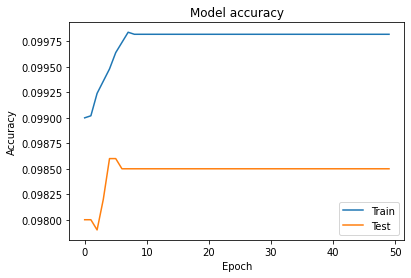

In [11]:
NetA = Sequential()
NetA.add(Flatten(input_shape=(32, 32, 3)))
NetA.add(Dense(10))

NetA.summary()

Compile_and_Train_Evaluate_PlotCurve(NetA)

.

# NetB

***Description assigned for NetB:-*** The second neural network will be slightly more complicated in that it has a hidden layer with 300
nodes and adds a non-linearity between the layers. It should use the following operations in this
order:

a) Flatten the image to a vector for the input<br>
b) Use a fully-connected linear layer with 300 hidden-neurons<br>
c) Use the ReLU activation function<br>
d) Use a fully-connected linear layer to the 10 outputs<br>

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               921900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
782/782 [==============================] - 5s 5ms/step - loss: 9.2129 - accuracy: 0.0995 - val_loss: 9.6386 - val_accuracy: 0.1000
Epoch 2/50
782/782 [==============================] - 3s 4ms/step - loss: 9.5606 - accuracy: 0.1011 - val_loss: 9.6273 - val_accuracy: 0.1000
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 9.6557 - accuracy: 0

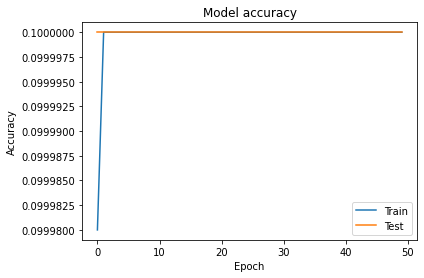

In [12]:
NetB = Sequential()
NetB.add(Flatten(input_shape=(32, 32, 3)))
NetB.add(Dense(units= 300,activation='relu'))
NetB.add(Dense(10))

NetB.summary()

Compile_and_Train_Evaluate_PlotCurve(NetB)

.

# NetC

***Description assigned for NetC:-*** This third neural network will be a convolutional neural network. It should use the following operations in this order:

a) Use a convolution layer with kernel-width 5 and depth 25<br>
b) Use the ReLU activation function<br>
c) Use a max-pool operation with kernel-width 2 and stride 2<br>
d) Flatten the image to a vector for the next step's input<br>
e) Use a fully-connected linear layer to the 10 outputs<br>

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 25)        1900      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 25)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                49010     
Total params: 50,910
Trainable params: 50,910
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
782/782 [==============================] - 32s 6ms/step - loss: 4.6202 - accuracy: 0.0997 - val_loss: 4.9583 - val_accuracy: 0.1000
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 4.9054 - accuracy: 0.0988 - val

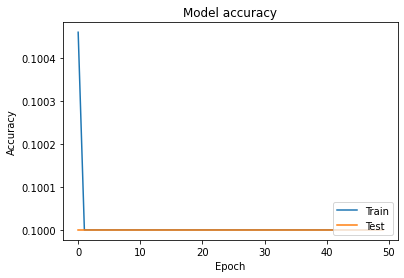

In [13]:
NetC = Sequential()
NetC.add(Conv2D(25, (5, 5), activation='relu', input_shape=(32, 32, 3)))
NetC.add(MaxPool2D(pool_size=2,strides=2))
NetC.add(Flatten())
NetC.add(Dense(10))

NetC.summary()

Compile_and_Train_Evaluate_PlotCurve(NetC)

.

### This was my approach for the assigned task. Please contact for any clarification about working and structure of the script. Looking forward to work as an intern at your prestigious institution.